In [1]:
import pandas as pd
from IPython.display import Markdown
from IPython.display import Image
import numpy as np

In [2]:
#Load cleaned data file
df = pd.read_csv('combined_file.csv')

In [3]:
#Load Image
print("Tornado Damages and Fatalities in The United States Since 1950")
Image(url="images/west_lib_1.jpg")

Tornado Damages and Fatalities in The United States Since 1950


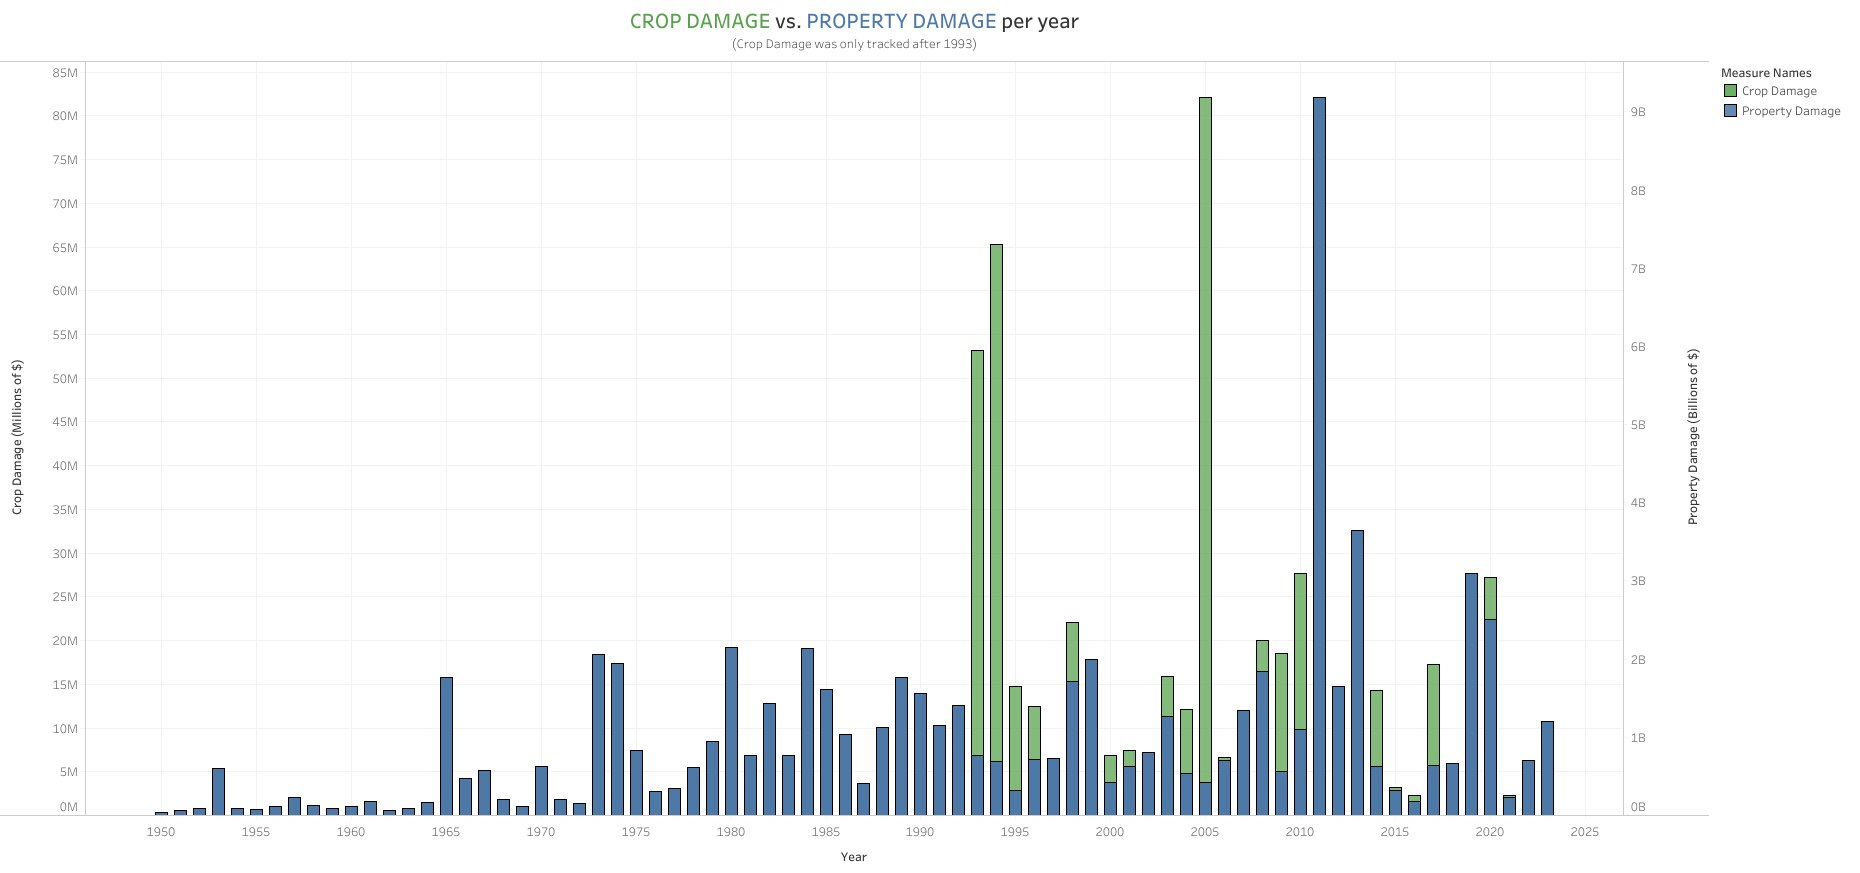

In [4]:
#load tableau vizz crop vs property damage
Image(filename='images/cr_pr.jpg')

In [5]:
#Load the combined_file.csv into a DataFrame
combined_file = pd.read_csv('combined_file.csv')

#Remove the $ from Crop Damage and Property Damage columns
combined_file['Crop Damage'] = combined_file['Crop Damage'].str.replace('$', '')
combined_file['Property Damage'] = combined_file['Property Damage'].str.replace('$', '')

#Retrive data for specific column and year
def get_data_for_year_and_column(year, column):
    # Filter the DataFrame for the specified year
    data_for_year = combined_file[combined_file['Year'] == year]
    
    #Check if data exists for the year
    if not data_for_year.empty:
        # Retrieve data for the column
        data = data_for_year.iloc[0][column]
        
        #Check if the column is Crop Damage or Property Damage
        if column == 'Crop Damage' or column == 'Property Damage':
            # Convert data to numeric
            data = pd.to_numeric(data, errors='coerce')
            
            #Format data to display in $ format
            data = "${:,.0f}".format(data)
        
        return data
    else:
        return 'No data recorded for that year'

#Intro to Crops and Property Damage
bold_text = "**Crop and Property Damage**"
additional_text = "In this section of the project, you can view crop and property damage along with the number of tornadoes for each year. Please note that crop damage was only tracked after 1993."
display(Markdown(bold_text))
print(additional_text)

#Ask the user for input
year_input = input("Enter the year to get the data for that year(1950-2023): ")
column_input = input("Enter the column name to look up (Options: Crop Damage, Property Damage, # of Tornadoes): ")

#Convert the input year to integer
year_input = int(year_input)

#Retrieve data for the specified year and column
data_for_year_and_column = get_data_for_year_and_column(year_input, column_input)

#Print the result
print(f"{column_input} in {year_input}: {data_for_year_and_column}")

**Crop and Property Damage**

In this section of the project, you can view crop and property damage along with the number of tornadoes for each year. Please note that crop damage was only tracked after 1993.


Enter the year to get the data for that year(1950-2023):  2021
Enter the column name to look up (Options: Crop Damage, Property Damage, # of Tornadoes):  Crop Damage


Crop Damage in 2021: $2,238,400


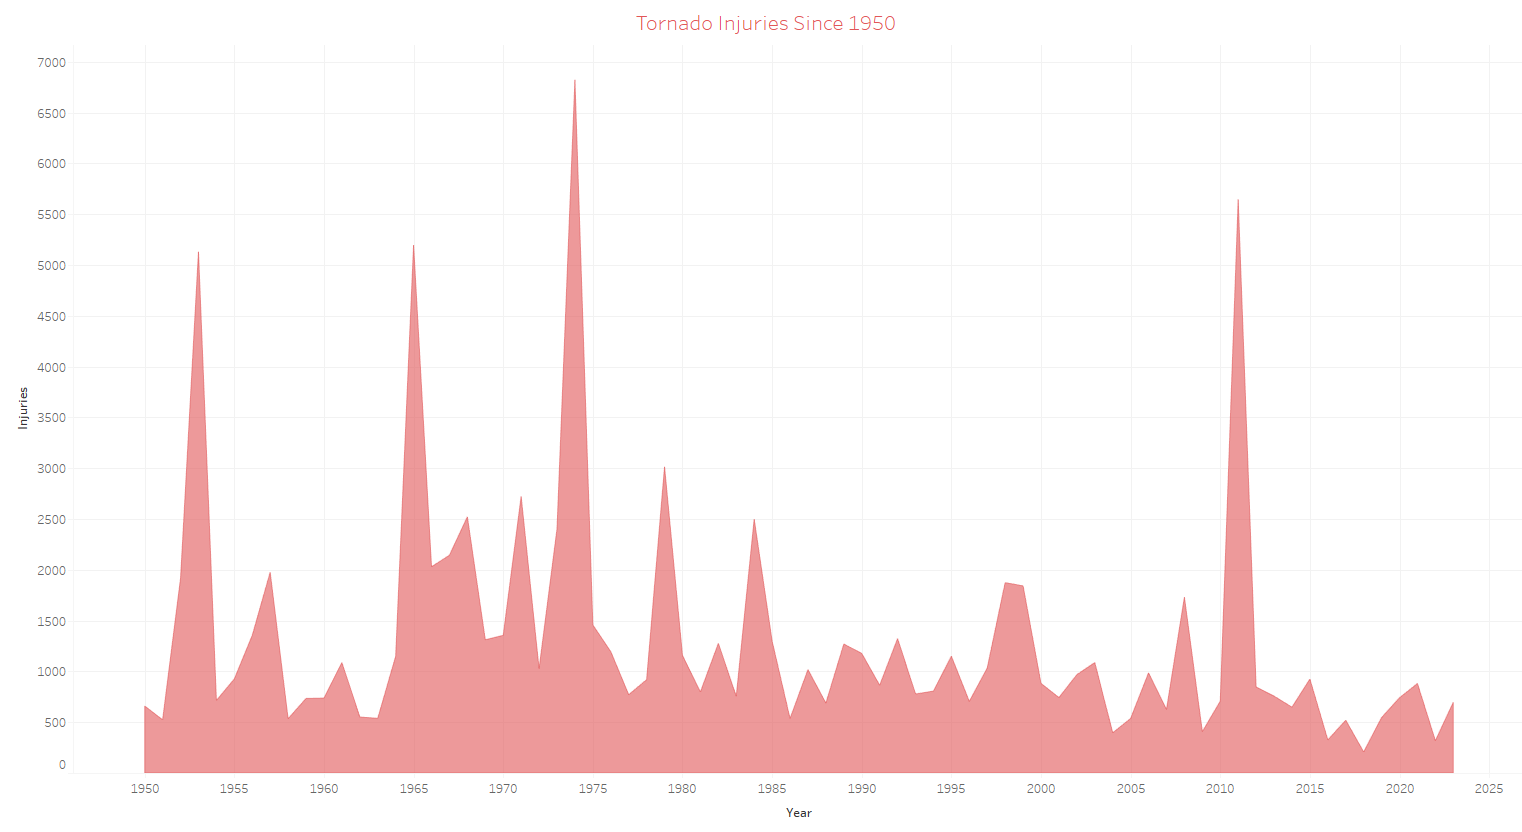

In [6]:
#load tableau vizz Injuries
Image(filename='images/tornado_injuries.png')

In [7]:
#Load the combined_file.csv into a DataFrame
combined_file = pd.read_csv('combined_file.csv')

#Intro to Injuries
bold_text = "**Injuries**"
additional_text = "In this section, you can explore the annual injuries resulting from tornadoes."
display(Markdown(bold_text))
print(additional_text)

#Ask the user for input
year_input = input("Enter the year to get the number of injuries for that year: ")

#Convert the input year to integer
year_input = int(year_input)

#Filter the DataFrame for the specified year
data_for_year = combined_file[combined_file['Year'] == year_input]

#Check if data exists for the specified year
if not data_for_year.empty:
    # Retrieve the number of injuries for the specified year
    num_injuries = data_for_year.iloc[0]['Injuries']
    print(f"The number of injuries in {year_input} was: {num_injuries}")
else:
    print("No data found for the specified year.")

**Injuries**

In this section, you can explore the annual injuries resulting from tornadoes.


Enter the year to get the number of injuries for that year:  1987


The number of injuries in 1987 was: 1018


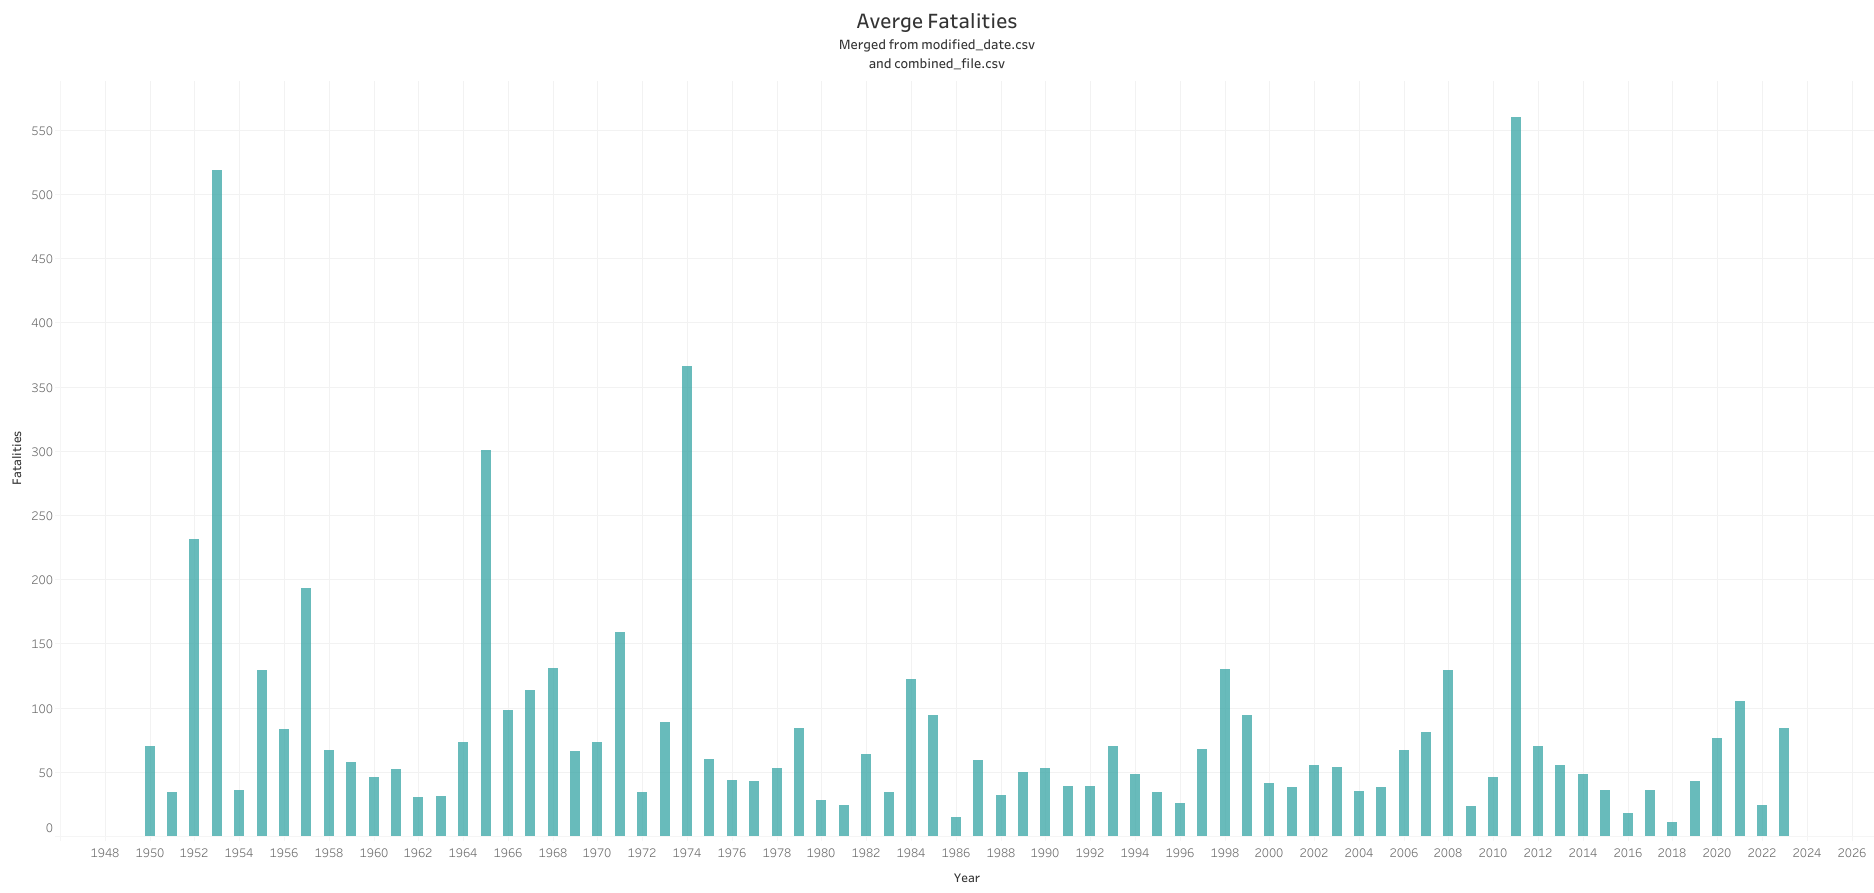

In [8]:
#Load tableau vizz average fatalities
Image(filename='images/avg_fat.png')

In [9]:
#Load the datasets
modified_date = pd.read_csv('modified_date.csv')
combined_file = pd.read_csv('combined_file.csv')

bold_text = "**Fatalities**"
additional_text = "In this section, you can explore the annual Fatalities resulting from tornadoes."
display(Markdown(bold_text))
print(additional_text)

#Merge the datasets column
merged_df = pd.merge(modified_date, combined_file, on='Year', how='inner')

#Calculate the average fatalities per year from both df and divide by 2
merged_df['Average_Fatalities'] = (merged_df['Fatalities_x'] + merged_df['Fatalities_y']) / 2

#Round the Average_Fatalities column and store it in a new column named 'Fatalities'
merged_df['Fatalities'] = merged_df['Average_Fatalities'].round().astype(int)

#Create a new df with only the Year and Fatalities columns
new_df = merged_df[['Year', 'Fatalities']]

#Save the new df to a CSV file
new_df.to_csv('combined_average_fatalities.csv', index=False)

#Ask the user for a year
input_year = input("Enter a year to get the average number of fatalities between the two files(1950-2023): ")
    
#Convert to int
input_year = int(input_year)
    
#Filter the merged df for the specified year
yearly_data = merged_df[merged_df['Year'] == input_year]

#Get the average number of fatalities for year
if len(yearly_data) > 0:
    average_fatalities_for_input_year = yearly_data['Fatalities'].iloc[0]
    print(f"Average number of fatalities for {input_year} between the two files: {average_fatalities_for_input_year}")
else:
    print(f"No data available for the year {input_year} between the two files")

**Fatalities**

In this section, you can explore the annual Fatalities resulting from tornadoes.


Enter a year to get the average number of fatalities between the two files(1950-2023):  1951


Average number of fatalities for 1951 between the two files: 34


In [10]:
#Split the concatenated values in the "Property Damage" column and convert them to numeric
df['Property Damage'] = df['Property Damage'].apply(lambda x: sum(float(i) for i in x.split('$') if i.strip()))

#Calculate average property damage
average_property_damage = df["Property Damage"].mean()

#Convert the average property damage back to $
average_property_damage_dollars = "${:,.2f}".format(average_property_damage)

#Print the average property damage
bold_text = "**Average Property Damage from 1950 to 2023**"
display(Markdown(bold_text))
print("The average Property Damage from 1950 to 2023 is", average_property_damage_dollars)

**Average Property Damage from 1950 to 2023**

The average Property Damage from 1950 to 2023 is $970,478,139.05


In [11]:
#Convert non-string values to string
df['Crop Damage'] = df['Crop Damage'].apply(lambda x: sum(float(i) for i in str(x).split('$') if i.strip()))

#Calculate average crop damage
average_crop_damage = df["Crop Damage"].mean()

#Convert the average crop damage back to $
average_crop_damage_dollars = "${:,.2f}".format(average_crop_damage)

#Print the average crop damage
bold_text = "**Average Crop Damage from 1950 to 2023**"
display(Markdown(bold_text))
print("The average Crop Damage from 1950 to 2023 is", average_crop_damage_dollars)

**Average Crop Damage from 1950 to 2023**

The average Crop Damage from 1950 to 2023 is $15,799,214.38


In [12]:
##Calculate average injuries and round to the nearest whole number
average_injuries = round(df["Injuries"].mean())

# Print the average injuries
bold_text = "**Average Injuries from 1950 to 2023**"
display(Markdown(bold_text))
print("The average Injuries from 1950 to 2023 is", average_injuries)

**Average Injuries from 1950 to 2023**

The average Injuries from 1950 to 2023 is 1330


In [13]:
##Calculate average fatalities and round to the nearest whole number
average_fatalities = round(df["Fatalities"].mean())

#Print the average fatalities
bold_text = "**Average Fatalities from 1950 to 2023**"
display(Markdown(bold_text))
print("The average Fatalities from 1950 to 2023 is", average_fatalities)

**Average Fatalities from 1950 to 2023**

The average Fatalities from 1950 to 2023 is 84
